## 🌦️ Weather CSV File

**🏷️ Tags:** `weather`, `rain`, `snow`, `sleet`, `fog`, `temperature`, `wind`, `climate`, `environment`, `geology`

---

### 📚 Overview

This dataset contains **weekly weather summaries** for cities across the United States during the year **2016**.

It is based on data provided by the **National Weather Service** under the **National Oceanic and Atmospheric Administration (NOAA)**. Weather information is collected daily through **122 Weather Forecast Offices (WFOs)** distributed throughout the U.S. Each office reports conditions for multiple cities within its region.

These daily reports have been aggregated into **weekly-level data**, making the dataset ideal for:

* 📈 Trend analysis
* 🌡️ Climate pattern studies
* 🤖 Weather prediction models
* 📊 Data visualization & education

---



In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 📥 Load Data

In this step, we import necessary Python libraries and load the weather dataset into a DataFrame.


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("weather.csv")
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


## 📊 Exploratory Data Analysis (EDA)

We'll begin by understanding the structure and basic statistics of the dataset, including:
- Dataset shape
- Data types and non-null counts
- Descriptive statistics
- Missing values analysis


In [5]:
df.shape

(16743, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

In [7]:
df.describe()

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


In [8]:
df.isna().sum()

,0
Data.Precipitation,0
Date.Full,0
Date.Month,0
Date.Week of,0
Date.Year,0
Station.City,0
Station.Code,0
Station.Location,0
Station.State,0
Data.Temperature.Avg Temp,0


### 🏷️ Feature Renaming

To make the column names more readable and easier to work with, we renamed several columns to shorter, more consistent formats.


In [9]:
df.columns
df.rename(columns={"Data.Precipitation":"Precipitation",
                   "Date.Full":"date",
                   "Date.Month":"Month",
                   "Date.Week of":"Week_of",
                   "Date.Year":"Year",
                   "Station.City":"City",
                   "Station.Code":"Code",
                   "Station.Location":"Location",
                   "Station.State":"State",
                   "Data.Temperature.Avg Temp":"Temperature_Avg_Temp",
                   "Data.Temperature.Max Temp":"Temperature_Max_Temp",
                   "Data.Temperature.Min Temp":"Temperature_Min_Temp",
                   "Data.Wind.Direction":"Wind_Direction",
                   "Data.Wind.Speed":"Wind_Speed"},inplace=True)

## 📈 Data Visualization

Now, we’ll visualize different aspects of the dataset including distributions, trends over time, and correlations.


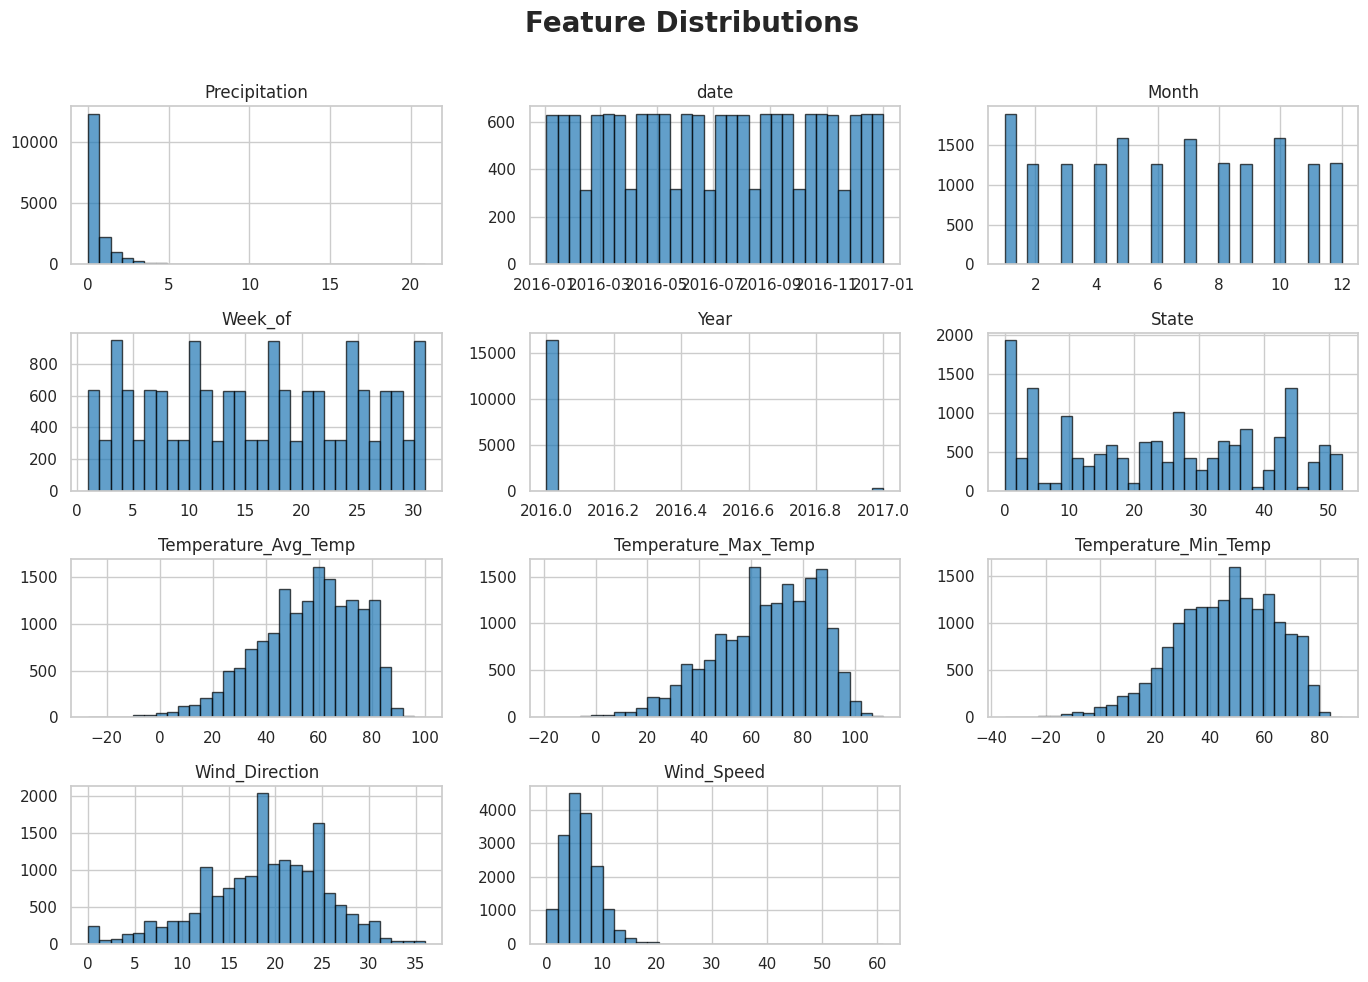

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern Seaborn style
sns.set_theme(style="whitegrid")

# Plot histograms with improved aesthetics
df.hist(
    bins=30,              # fewer bins for smoother plots
    figsize=(14, 10),     # larger figure size
    color='#1f77b4',      # modern blue tone
    edgecolor='black',    # clear bin boundaries
    alpha=0.7             # slight transparency
)

# Add a clean overall title
plt.suptitle('Feature Distributions', fontsize=20, fontweight='bold')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [11]:
df["date"] = pd.to_datetime(df["date"])

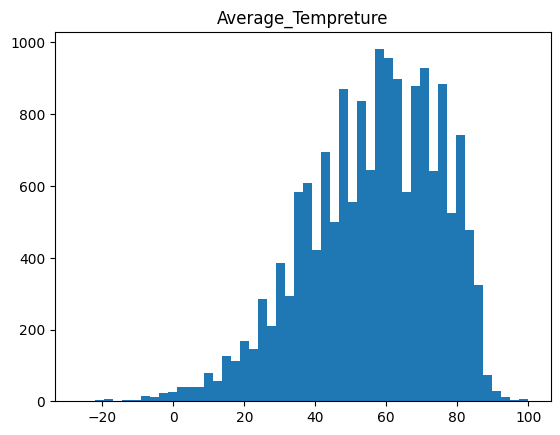

In [12]:
plt.hist(df["Temperature_Avg_Temp"], bins= 50)
plt.title("Average_Tempreture")
plt.show()

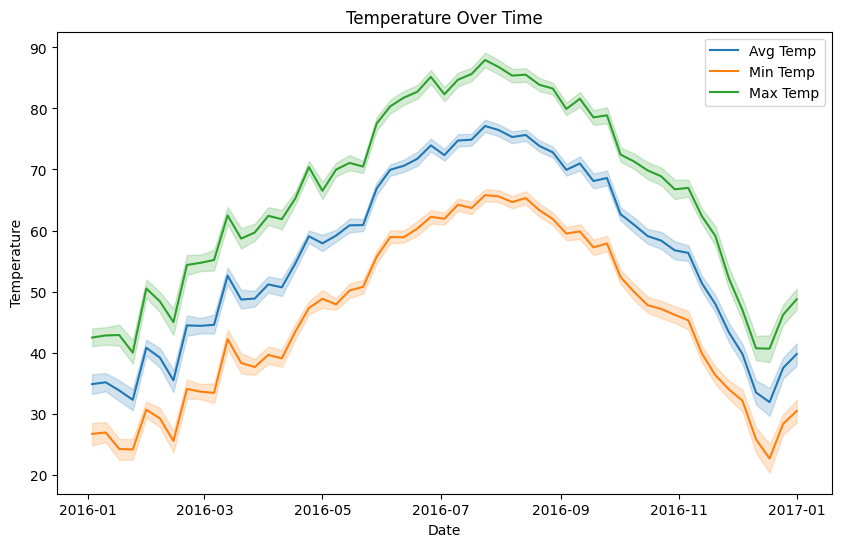

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=df["date"], y=df["Temperature_Avg_Temp"], label="Avg Temp")
sns.lineplot(x=df["date"], y=df["Temperature_Min_Temp"], label="Min Temp")
sns.lineplot(x=df["date"], y=df["Temperature_Max_Temp"], label="Max Temp")
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()


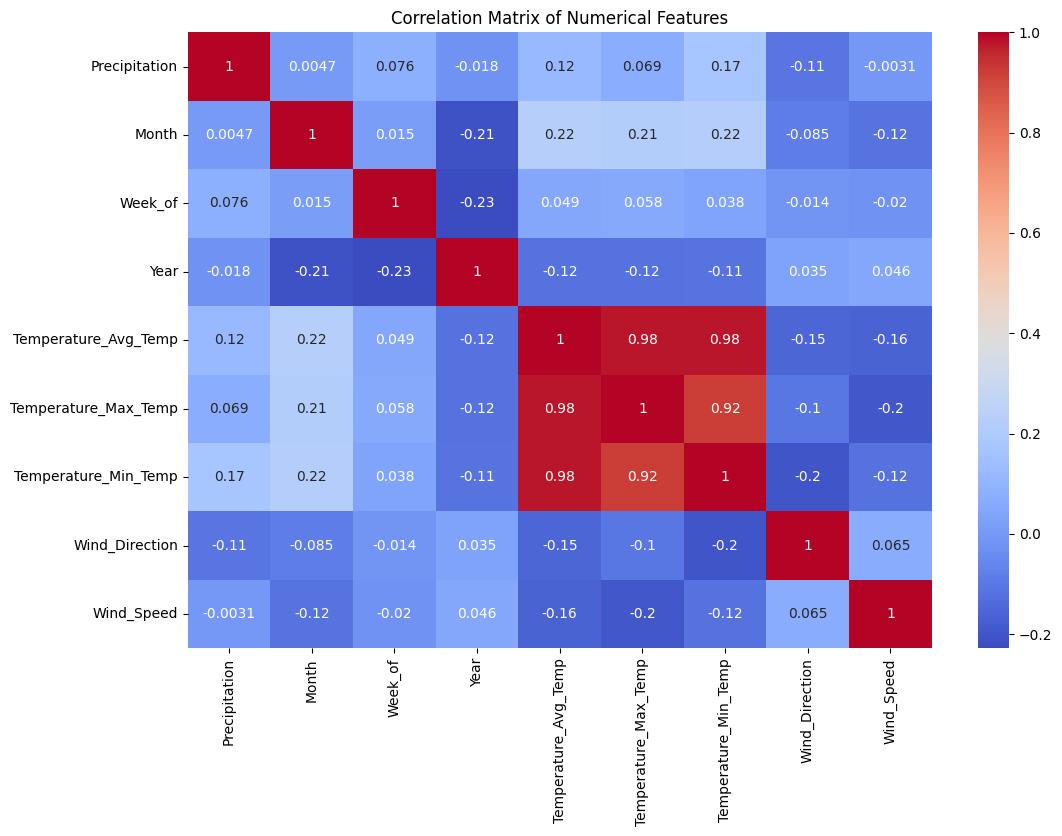

In [14]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 🧠 Feature Engineering

We'll encode categorical variables and scale numerical ones for model training.


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns to encode:", categorical_cols)


Categorical columns to encode: Index(['City', 'Code', 'Location', 'State'], dtype='object')


In [16]:
data_encoded = df[categorical_cols].drop(["City","Code","Location"],axis=1)
data_encoded.head()

,State
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alaska


In [17]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = le.fit_transform(data_encoded.to_numpy().reshape(-1,1))
df["State"] = data_encoded

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 🔢 Feature Scaling

Scaling the numerical features to normalize their ranges.


In [18]:
# Sperate Features And Target
X = df.drop(["Temperature_Avg_Temp","Temperature_Max_Temp","Temperature_Min_Temp","date","City","Code","Location"], axis=1)
Y = df["Temperature_Avg_Temp"]

In [19]:
numerical_features = X.select_dtypes(include=["float64","int64"]).columns
X.columns

Index(['Precipitation', 'Month', 'Week_of', 'Year', 'State', 'Wind_Direction',
       'Wind_Speed'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[numerical_features])
X.head()

,Precipitation,Month,Week_of,Year,State,Wind_Direction,Wind_Speed
0,0.00,1,3,2016,0,33,4.33
1,0.00,1,3,2016,0,32,3.86
2,0.16,1,3,2016,0,35,9.73
3,0.00,1,3,2016,0,32,6.86
4,0.01,1,3,2016,1,19,7.80


### ✂️ Train-Test Split

We’ll split the dataset into training and testing sets to evaluate model performance.


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.3 , random_state=42)

### 🧪 Feature Selection

Using `SelectKBest` to select the top 4 most relevant features for prediction.


In [22]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 4 features
selector = SelectKBest(score_func=chi2, k=4)
fit = selector.fit(x_train, y_train)
print("Feature Scores:\n", fit.scores_)
selected_features = fit.transform(x_train)
print("\nTop 4 Features (first 5 rows):\n", selected_features[0:5,:])

selected_mask = selector.get_support()
selected_features = x_train.columns[selected_mask]
print("\nSelected features:", selected_features)

Feature Scores:
 [8.41262908e+02 1.66041992e+03 1.03932882e+03 2.98186178e-03
 4.38410532e+03 1.37871632e+03 1.29102640e+03]

Top 4 Features (first 5 rows):
 [[11.    0.   11.    4.05]
 [10.   36.   15.    7.68]
 [ 4.   44.   17.    7.1 ]
 [ 5.   38.   21.    3.84]
 [ 5.    1.   19.    5.5 ]]

Selected features: Index(['Month', 'State', 'Wind_Direction', 'Wind_Speed'], dtype='object')


## 🔍 Feature Extraction (PCA)

We'll use Principal Component Analysis to reduce dimensionality while preserving 95% of the variance.



Original number of selected features: 7
Reduced number of components with PCA: 3


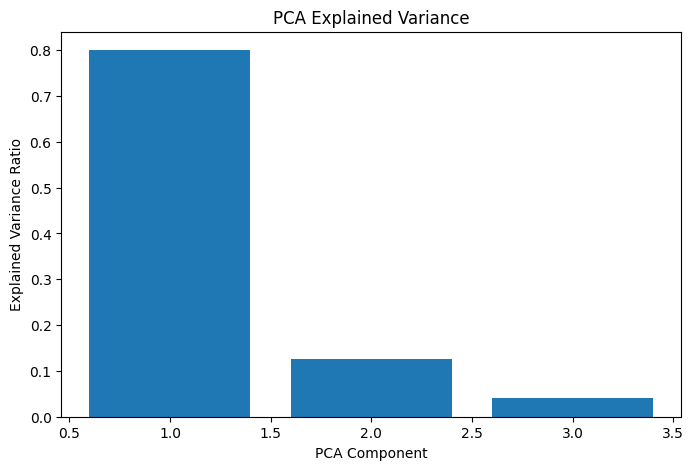

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(x_train[selected_features])

print(f"\nOriginal number of selected features: {x_train.shape[1]}")
print(f"Reduced number of components with PCA: {pca.n_components_}")

# Explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

## 🤖 Model Training & Evaluation

We’ll evaluate multiple regression models to predict the average weekly temperature:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

We’ll compare models based on:
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R² Score


Mean Absolute Error (MAE): 14.309682398268547
Mean Squared Error (MSE): 315.83335690023233
Root Mean Squared Error (RMSE): 17.77170101313412
R² Score: 0.10479382447084151


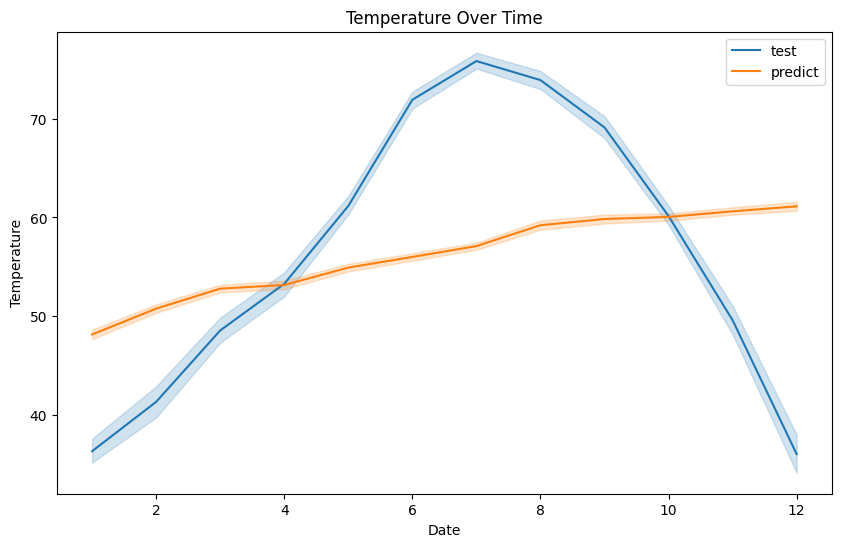

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)
yhat = lr.predict(x_test)

# MAE
mae = mean_absolute_error(y_test, yhat)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, yhat)
print("R² Score:", r2)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_test["Month"], y=y_test, label="test")
sns.lineplot(x=x_test["Month"], y=yhat, label="predict")
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

Mean Absolute Error (MAE): 4.65380725330148
Mean Squared Error (MSE): 48.43630016263521
Root Mean Squared Error (RMSE): 6.959619254142802
R² Score: 0.8627109072615403


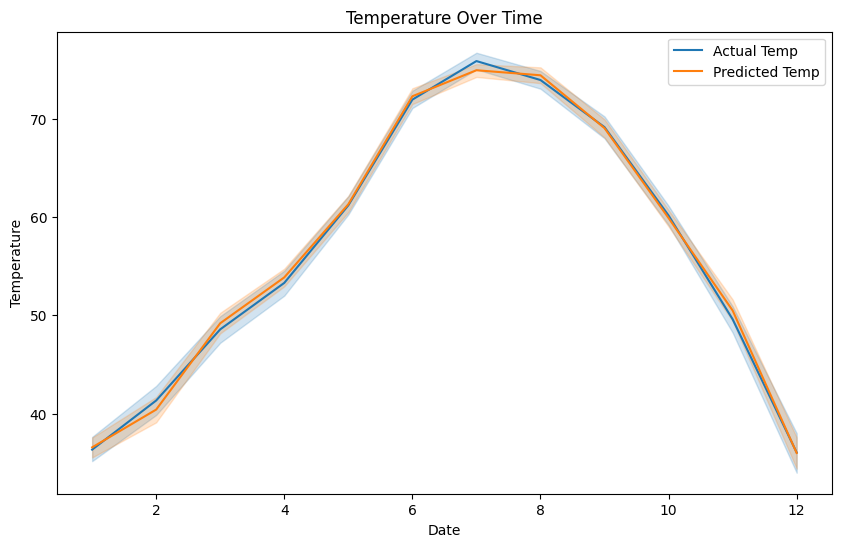

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(x_train,y_train)
yhat = rfg.predict(x_test)

# MAE
mae = mean_absolute_error(y_test, yhat)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, yhat)
print("R² Score:", r2)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_test["Month"], y=y_test, label="Actual Temp")
sns.lineplot(x=x_test["Month"], y=yhat, label="Predicted Temp")
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

          Feature  Importance
1           Month    0.558620
4           State    0.225613
6      Wind_Speed    0.066281
5  Wind_Direction    0.062787
0   Precipitation    0.048189
2         Week_of    0.037863
3            Year    0.000647


/tmp/ipython-input-3584604551.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


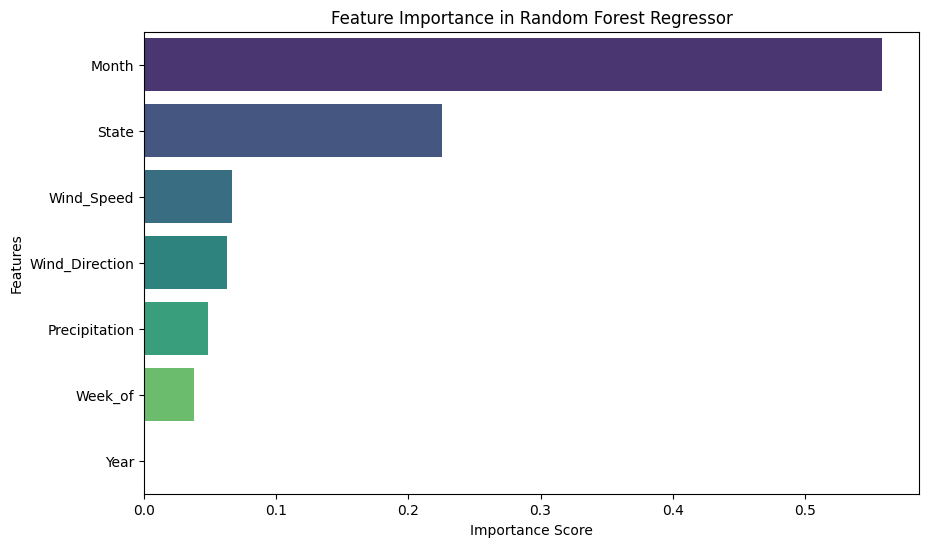

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rfg.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Mean Absolute Error (MAE): 6.002207082495668
Mean Squared Error (MSE): 68.14266849605377
Root Mean Squared Error (RMSE): 8.254857266849244
R² Score: 0.8068546709144049


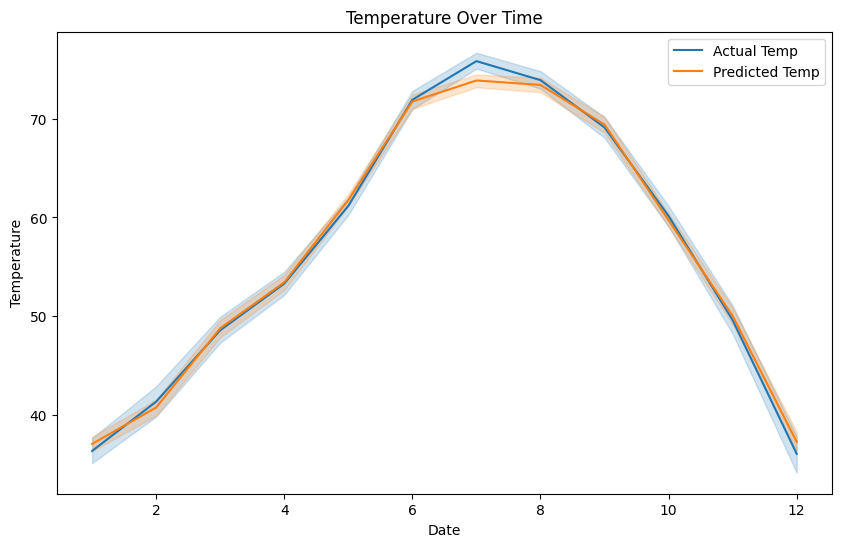

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
yhat = reg.predict(x_test)

# MAE
mae = mean_absolute_error(y_test, yhat)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, yhat)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, yhat)
print("R² Score:", r2)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_test["Month"], y=y_test, label="Actual Temp")
sns.lineplot(x=x_test["Month"], y=yhat, label="Predicted Temp")
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

Feature Importances:
          Feature  Importance
1           Month    0.675315
4           State    0.251852
5  Wind_Direction    0.029383
6      Wind_Speed    0.016276
2         Week_of    0.013590
0   Precipitation    0.013025
3            Year    0.000560


/tmp/ipython-input-58072044.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='mako')


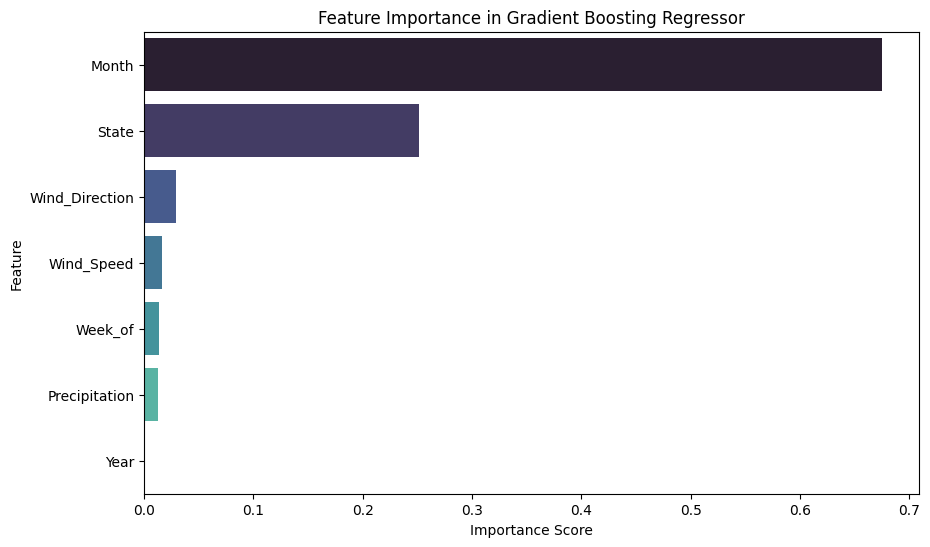

In [28]:

# Get feature importances
importances = reg.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='mako')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## ✅ Conclusion

In this notebook, we:
- Explored and cleaned the weather dataset
- Engineered and selected features
- Reduced dimensionality using PCA
- Trained and evaluated multiple regression models

📌 The Gradient Boosting Regressor (or best model you find) showed the best performance in predicting weekly average temperature.
